<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/05-cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 5: Cereal Data

## Introduction:


Everyone loves cereal. But have you ever thought deeply about your cereal? Well now is your chance to take a data driven view of your breakfast.

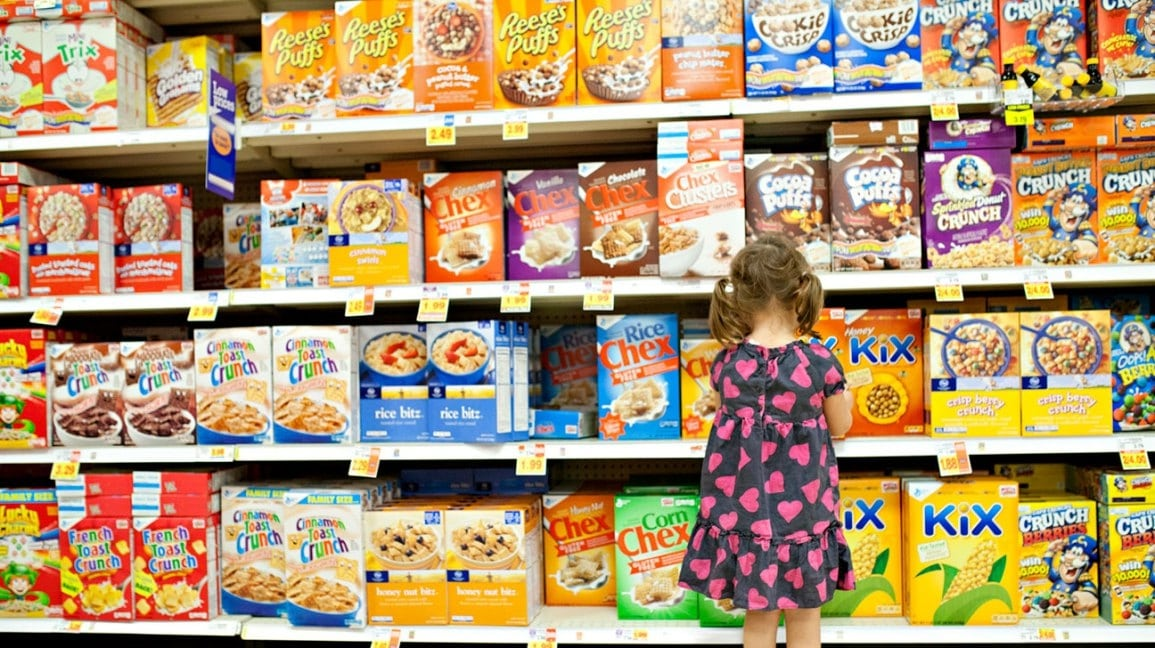


### Getting Started:
Download the data from github. Run the code below to download the data that you'll be using in this lab.

You may use pandas, numpy, matplotlib and/or seaborn for these excercises.

You can use/read their respective documentation in the links below (only if you need too, it's not required for the lab):

*   Seaborn [Documentation]("https://seaborn.pydata.org/tutorial.html")
*   Matplotlib [Documentation]("https://matplotlib.org/stable/api/index.html")
*   Numpy [Documentation]("https://numpy.org/doc/1.23/user/index.html#user")
*   Pandas [Documentation]("https://pandas.pydata.org/docs/user_guide/index.html#user-guide")







In [2]:
import pandas as pd
cereal = pd.read_csv('https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cereal.csv')

## Exercise 1: Protein Powder
Carbs, fats and proteins are the three primary macro nutrients. Create a figure plotting the distribution of each of these macro nutrients together (i.e., three distributions on a single plot). Make sure to provide a legend.

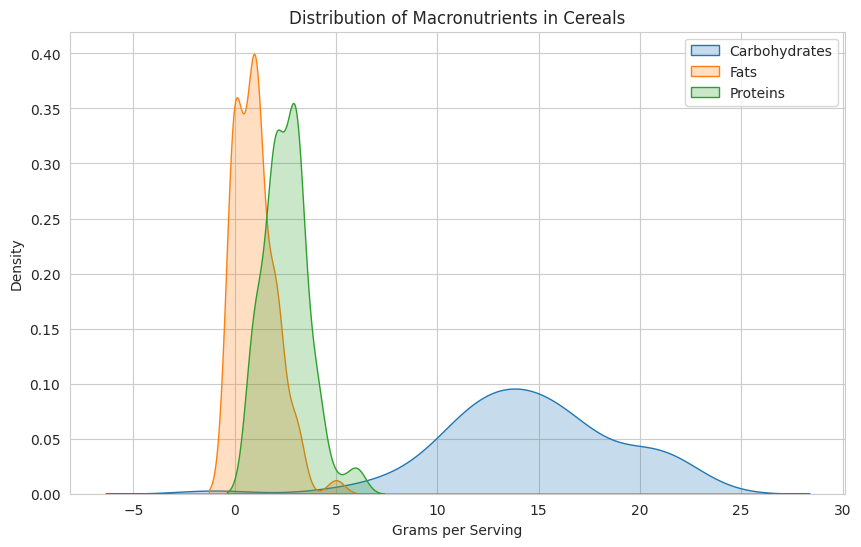

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cereal = pd.read_csv('https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cereal.csv')

# Set the style for better visualization
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.kdeplot(cereal['carbo'], label='Carbohydrates', fill=True)
sns.kdeplot(cereal['fat'], label='Fats', fill=True)
sns.kdeplot(cereal['protein'], label='Proteins', fill=True)

# Add labels and legend
plt.xlabel('Grams per Serving')
plt.ylabel('Density')
plt.title('Distribution of Macronutrients in Cereals')
plt.legend()
plt.show()


## Exercise 2: Sugar Daddy
Get a list of the top 5 most sugary cereals and the 5 least sugary cereals.

In [7]:
# Top 5 most sugary cereals
top_5_sugary = cereal.sort_values(by='sugars', ascending=False).head(5)

# 5 least sugary cereals
least_5_sugary = cereal.sort_values(by='sugars', ascending=True).head(5)

# Display the results
print("Top 5 Most Sugary Cereals:")
print(top_5_sugary[['name', 'sugars']])

print("\n5 Least Sugary Cereals:")
print(least_5_sugary[['name', 'sugars']])


Top 5 Most Sugary Cereals:
                     name  sugars
66                 Smacks      15
30           Golden Crisp      15
70      Total Raisin Bran      14
52  Post Nat. Raisin Bran      14
6             Apple Jacks      14

5 Least Sugary Cereals:
                         name  sugars
57             Quaker Oatmeal      -1
55               Puffed Wheat       0
20     Cream of Wheat (Quick)       0
63             Shredded Wheat       0
3   All-Bran with Extra Fiber       0


## Exercise 3: Cereal Killer
Get a list of the top 5 highest rated and lowest rated cereals.

In [ ]:
# Enter all of your code for exercise 3 here. Feel free to add more cells if you need to:


## Exercise 4: America
Quantify the relationship between sugar and ratings.

Make a plot to visualize this relationship. Superimpose a best fit line (with seaborn) to describe the relationship. It may be helpful to look at the [seaborn regplot documentation]("https://seaborn.pydata.org/generated/seaborn.regplot.html").

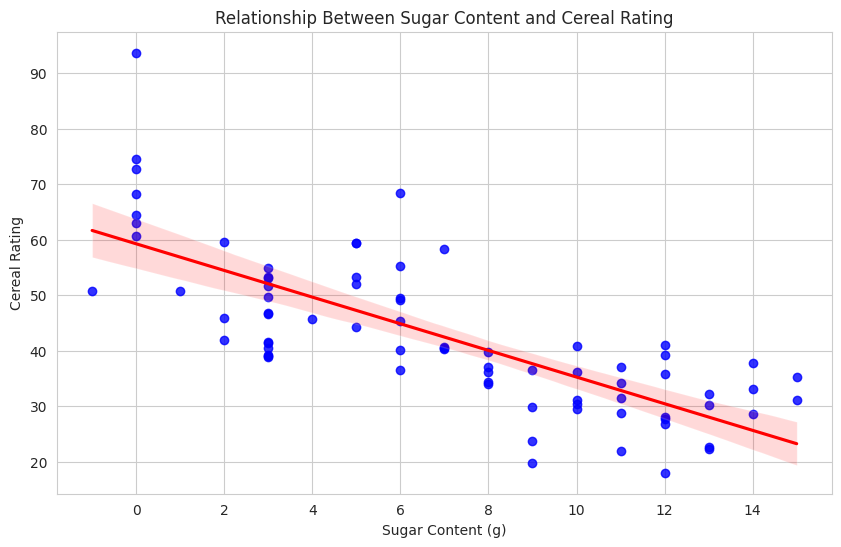

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='sugars', y='rating', data=cereal, scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Adding labels and title
plt.xlabel('Sugar Content (g)')
plt.ylabel('Cereal Rating')
plt.title('Relationship Between Sugar Content and Cereal Rating')

plt.show()


Calculate a correlation statistic describing the relationship between sugar and ratings  (i.e., r or r squared).

In [11]:
# Calculate the Pearson correlation coefficient
correlation = cereal['sugars'].corr(cereal['rating'])
# Calculate R-squared
r_squared = correlation ** 2

print(f"R-squared value between sugar and ratings: {r_squared:.2f}")

R-squared value between sugar and ratings: 0.58


Write a statement in plain English interpreting this statistic.

(Write your statement here)


## Exercise 5: America Part 2
Make five plots comparing the relationships of carbo, sugars, calories, protein, and fat with rating.

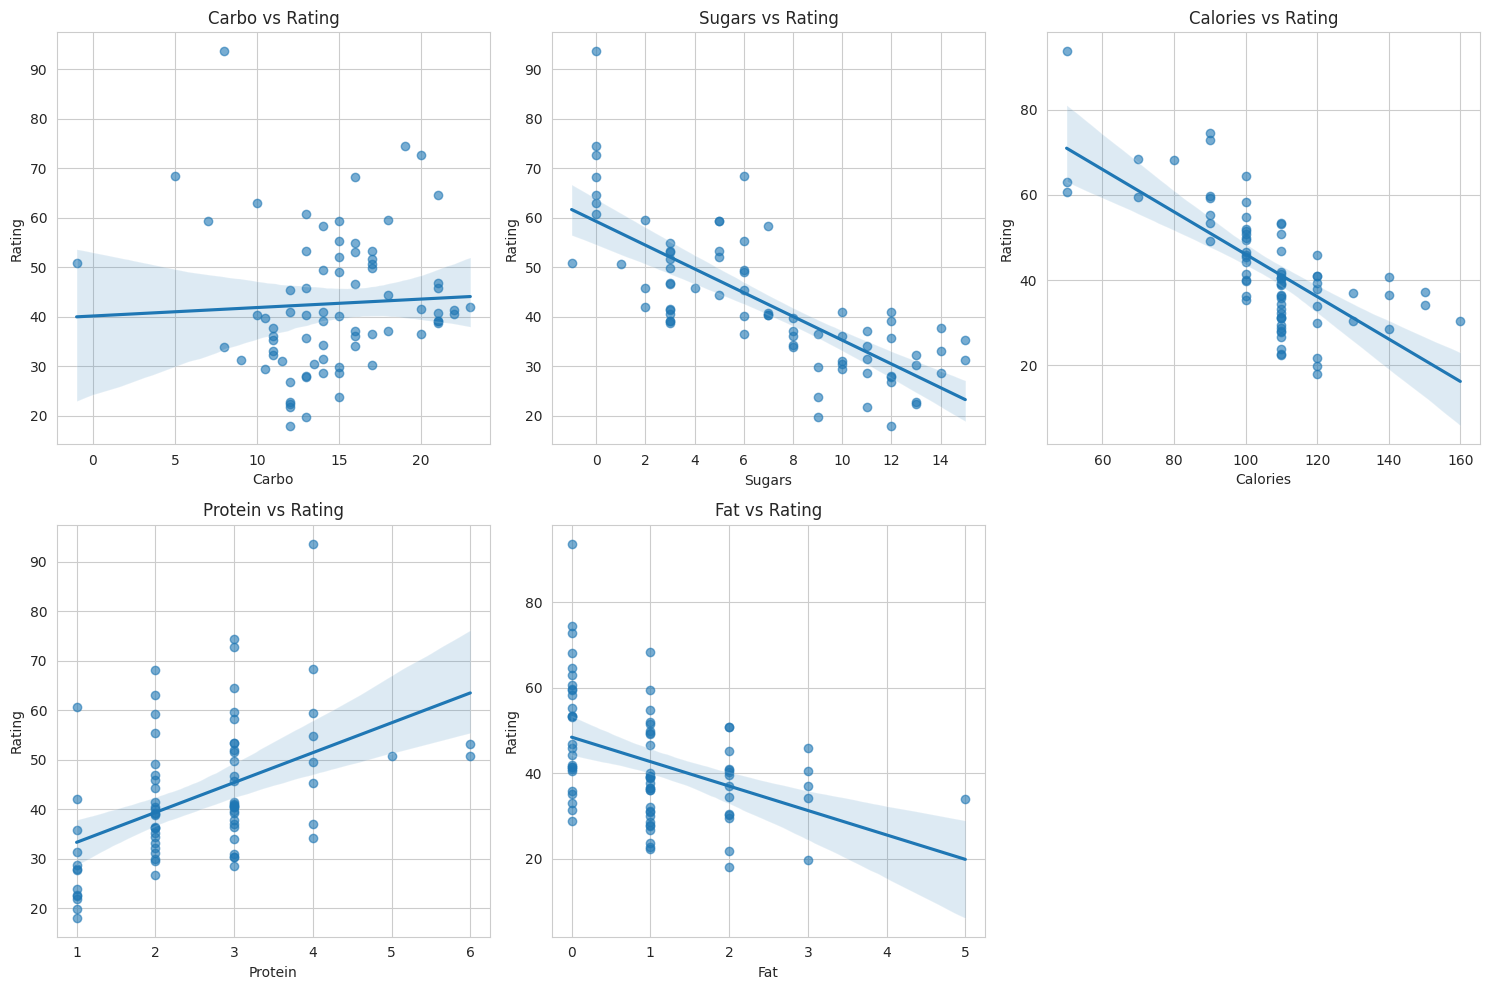

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.figure(figsize=(15, 10))

# List of nutrients to compare with ratings
nutrients = ['carbo', 'sugars', 'calories', 'protein', 'fat']

# Loop through each nutrient to create individual plots
for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid
    sns.regplot(x=cereal[nutrient], y=cereal['rating'], scatter_kws={'alpha':0.6})
    plt.title(f'{nutrient.capitalize()} vs Rating')
    plt.xlabel(nutrient.capitalize())
    plt.ylabel('Rating')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Of the variables carbo, sugars, calories, protein, and fat, which has the strongest relationship with rating? Justify your answer.

(Write your statement here)

## Exercise 6: Preparing for Mt. Everest
Do the same as you did with exercise 5, but instead compare carbo, sugars, protein, and fat with calories.

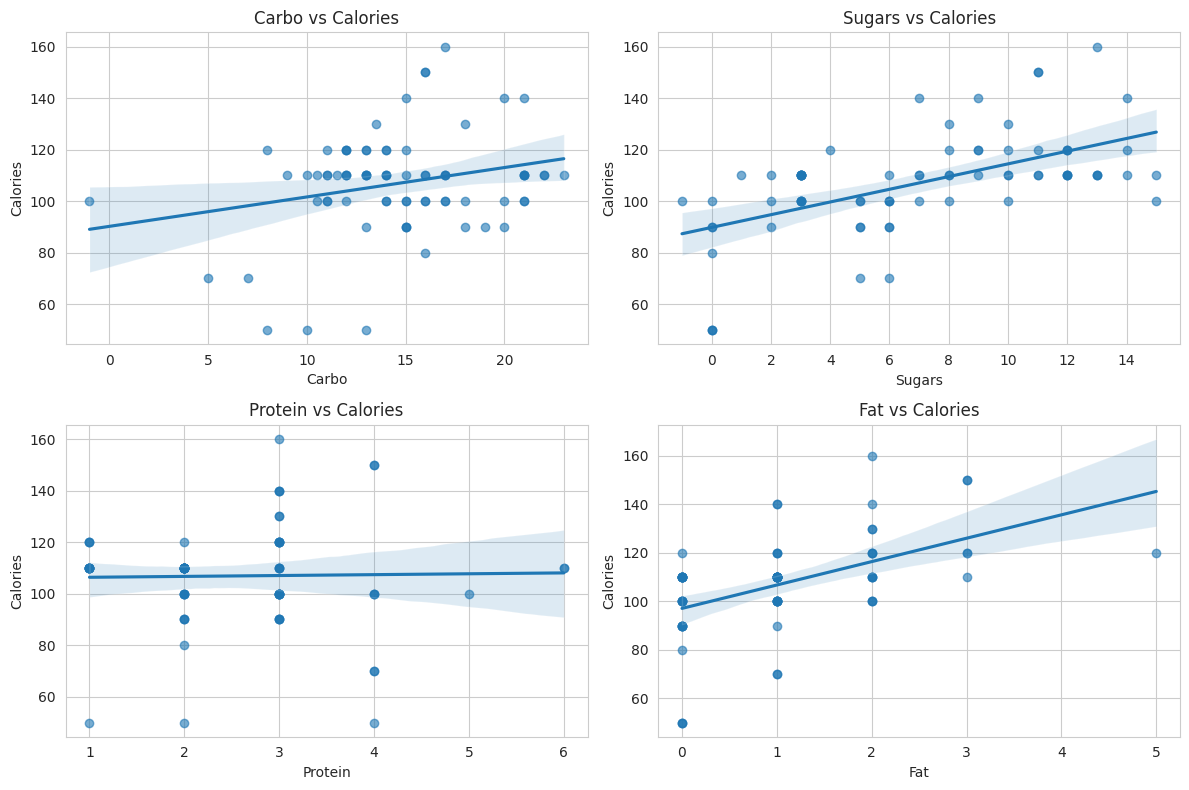

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.figure(figsize=(12, 8))

# List of nutrients to compare with calories
nutrients = ['carbo', 'sugars', 'protein', 'fat']

# Loop through each nutrient to create individual plots
for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(2, 2, i)  # Arrange plots in a 2x2 grid
    sns.regplot(x=cereal[nutrient], y=cereal['calories'], scatter_kws={'alpha': 0.6})
    plt.title(f'{nutrient.capitalize()} vs Calories')
    plt.xlabel(nutrient.capitalize())
    plt.ylabel('Calories')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



Of the variables carbo, sugars, protein, and fat, which has the strongest relationship with calories? Justify your answer.

(Write your statement here)

## Exercise 7: It’s Hot and It's Cold
The type column has two values: H='hot' and C='cold'. What is the average rating of each type?

In [14]:
# Group by 'type' and calculate the mean rating
average_ratings = cereal.groupby('type')['rating'].mean()

# Display the average ratings for hot (H) and cold (C) cereals
print(average_ratings)



type
C    42.095218
H    56.737708
Name: rating, dtype: float64


## Exercise 8: Captain Crunch the Numbers
Provide one additional insight from this dataset that you found interesting. Create at least one figure and explain why the figure was interesting to you.

In [ ]:
u

im not sure if I'm doing this right but I liked how smooth it pulled up the graphs and how this allowed me to work through it with help
